In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Opening the CSV files
test = pd.read_csv('test_data.csv', encoding='cp1252')
training = pd.read_csv('training_data.csv', encoding='cp1252')

In [3]:
# Checking the column names
training.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [4]:
# Dataset Head
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
# Dataset Info
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Dataset Description
training.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# Checking gender qualitative qualifiers
training['gender'].unique()

array(['female', 'male'], dtype=object)

In [8]:
# Checking race/ethnicity qualitative qualifiers
training['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [9]:
# Checking parental level of education qualitative qualifiers
training['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [10]:
# Checking lunch qualitative qualifiers
training['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
# Checking test preparation course qualitative qualifiers
training['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [12]:
# Changing qualitative qualifiers to quantitative qualifiers
training_gender_qt = {'male': 1, 'female': 2}
training_race_qt = {'group A': 1, 'group B': 2, 'group C': 3, 'group D': 4, 'group E': 5}
training_parentalEducation_qt = {'some high school': 1, 'some college': 2, 'high school': 3, "associate's degree": 4, "master's degree": 5, "bachelor's degree": 6}
training_lunch_qt = {'free/reduced': 1, 'standard' : 2}
training_testPreparation_qt = {'none': 1, 'completed': 2}

training.replace(training_gender_qt, inplace = True)
training.replace(training_race_qt, inplace = True)
training.replace(training_parentalEducation_qt, inplace = True)
training.replace(training_lunch_qt, inplace = True)
training.replace(training_testPreparation_qt, inplace = True)

test.replace(training_gender_qt, inplace = True)
test.replace(training_race_qt, inplace = True)
test.replace(training_parentalEducation_qt, inplace = True)
test.replace(training_lunch_qt, inplace = True)
test.replace(training_testPreparation_qt, inplace = True)

In [13]:
# Changing the 0-100 notes to 1-5
#training["math score"] = pd.cut(training["math score"], bins=[-1, 59, 69, 79, 89, 100], labels=[1, 2, 3, 4, 5])
#training["reading score"] = pd.cut(training["reading score"], bins=[-1, 59, 69, 79, 89, 100], labels=[1, 2, 3, 4, 5])
training["writing score"] = pd.cut(training["writing score"], bins=[-1, 59, 69, 79, 89, 100], labels=[1, 2, 3, 4, 5])

In [14]:
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,2,6,2,1,72,72,3
1,2,3,2,2,2,69,90,4
2,2,2,5,2,1,90,95,5
3,1,1,4,1,1,47,57,1
4,1,3,2,2,1,76,78,3


In [15]:
# Checking if there is any missing values
training.isna().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [16]:
# Though there isn't any missing values, we'll use this code lines for check reasons
print(training.isna().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


<AxesSubplot:>

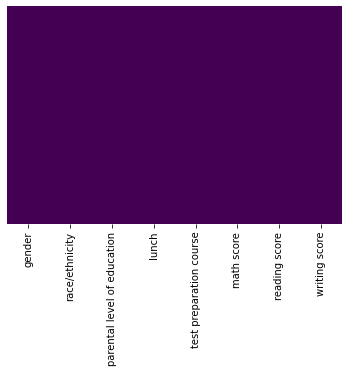

In [17]:
# Checking our dataset heatmap
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
# Now it's time to drop the rows that are duplicated 
training = training.drop_duplicates(keep='first')

In [19]:
# Finnaly we will remove the rows where the values are all the same
for name in training.keys():
    listaDados = training[name]
    element = listaDados[0]
    chk     = True
    for item in listaDados:
        if element != item:
            chk = False
            break;
    if chk:
        training = training.drop([name], axis=1)
        test = test.drop([name], axis=1)

In [20]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       997 non-null    int64   
 1   race/ethnicity               997 non-null    int64   
 2   parental level of education  997 non-null    int64   
 3   lunch                        997 non-null    int64   
 4   test preparation course      997 non-null    int64   
 5   math score                   997 non-null    int64   
 6   reading score                997 non-null    int64   
 7   writing score                997 non-null    category
dtypes: category(1), int64(7)
memory usage: 95.8 KB


<AxesSubplot:>

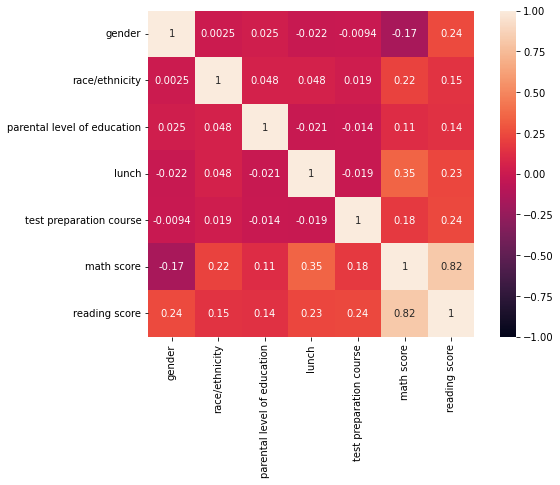

In [21]:
# Checking the correlation matrix
corr_matrix = training.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [22]:
# Visualize how the dataset is at this moment 
training.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,2,2,6,2,1,72,72,3
1,2,3,2,2,2,69,90,4
2,2,2,5,2,1,90,95,5
3,1,1,4,1,1,47,57,1
4,1,3,2,2,1,76,78,3


In [23]:
# Starting to prepare the Predicitions

X = training.drop(['writing score'], axis=1)
y = training['writing score']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2021, stratify=y)

<AxesSubplot:xlabel='writing score', ylabel='count'>

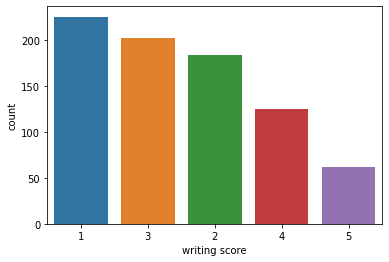

In [25]:
# Checking the values in y_train
sns.countplot(x = y_train, order = training['writing score'].value_counts().index)

<AxesSubplot:xlabel='writing score', ylabel='count'>

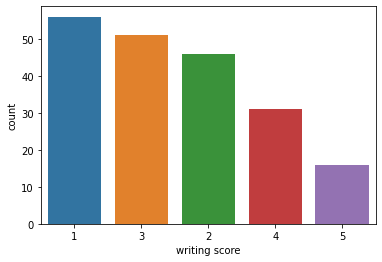

In [26]:
# Checking if the values in y_test look like the ones in y_train 
sns.countplot(x = y_test, order = training['writing score'].value_counts().index)

In [27]:
# Using the Decision Tree Classifier Regression method

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

treemodel = DecisionTreeClassifier()
treemodel.fit(X_train,y_train)

predictions = treemodel.predict(X_test)
predictions

array([2, 4, 1, 5, 1, 4, 1, 2, 3, 2, 5, 2, 3, 4, 3, 3, 3, 3, 3, 2, 4, 1,
       3, 4, 3, 4, 1, 2, 4, 1, 2, 4, 4, 1, 2, 1, 1, 2, 2, 3, 3, 1, 3, 4,
       2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 2, 5, 2, 1, 4, 2, 4, 4, 4, 2, 1,
       2, 3, 1, 2, 2, 2, 1, 5, 4, 4, 2, 5, 4, 1, 3, 5, 3, 3, 5, 1, 3, 2,
       2, 2, 3, 1, 1, 5, 3, 4, 1, 1, 3, 4, 1, 3, 3, 3, 5, 3, 2, 2, 2, 5,
       3, 3, 2, 4, 4, 1, 2, 3, 4, 1, 5, 2, 2, 2, 2, 1, 1, 3, 2, 4, 5, 4,
       2, 3, 1, 2, 2, 1, 4, 3, 1, 1, 2, 1, 2, 3, 2, 5, 3, 2, 3, 3, 4, 5,
       4, 4, 5, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       2, 3, 1, 5, 5, 4, 3, 1, 1, 3, 2, 4, 2, 4, 4, 1, 2, 1, 1, 3, 3, 2,
       2, 3], dtype=int64)

              precision    recall  f1-score   support

           1       0.88      0.79      0.83        56
           2       0.54      0.63      0.58        46
           3       0.55      0.51      0.53        51
           4       0.44      0.45      0.44        31
           5       0.65      0.69      0.67        16

    accuracy                           0.62       200
   macro avg       0.61      0.61      0.61       200
weighted avg       0.63      0.62      0.62       200

You have got  0.62 accuracy  in this prediction


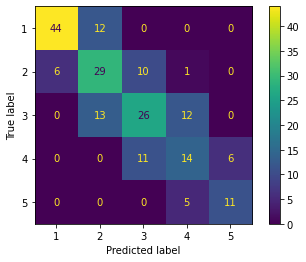

In [28]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=treemodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=treemodel.classes_)
disp.plot()

In [29]:
scores = cross_val_score(treemodel, X, y, cv=10)
print(scores)
print("\nRESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.71       0.71       0.67       0.61       0.62       0.64
 0.58       0.5959596  0.5959596  0.65656566]

RESULT: 0.64 accuracy with a standard deviation of 0.04


In [30]:
# Using the Linear Regression method

from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

predictions = linearmodel.predict(X_test)
predictions

array([ 1.81576284,  4.27656326,  1.68830553,  4.04261341,  1.10863254,
        3.23475394,  0.69284029,  2.01529033,  2.41427996,  1.89911797,
        4.22075409,  1.91489079,  2.29535454,  3.3016258 ,  2.35087219,
        2.86323473,  2.93922507,  2.82380785,  3.33419215,  2.29153658,
        3.34168039,  1.90645381,  3.47874108,  4.04068098,  3.95709922,
        4.06643232,  1.76713005,  2.58853173,  4.12097199,  1.59343304,
        2.04409451,  3.45071121,  3.16403957,  1.47289871,  1.59149093,
        1.53663191,  0.96459725,  1.74733448,  2.3189048 ,  3.08533431,
        2.78824694,  2.02216114,  3.10625137,  3.50427269,  1.95895625,
        1.96077053,  1.32770662,  1.02828464,  2.24466977,  2.68633501,
        1.96946858,  3.05094488,  0.71774558,  1.98598109,  3.98367506,
        2.30181318,  4.675199  ,  2.37757747, -0.02736776,  3.87403639,
        2.86722135,  4.11556637,  3.59991858,  3.11991563,  2.91708711,
        1.8815604 ,  2.17943166,  3.26968414, -1.49027195,  2.88

You have got  0.83 accuracy  in this prediction


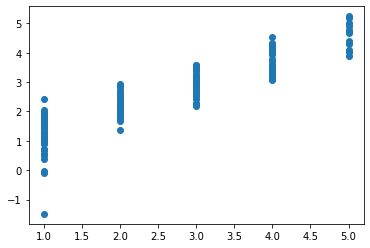

In [31]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score

# Printing the results

print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % r2_score(y_test, predictions))

plt.scatter(y_test, predictions)

In [32]:
scores = cross_val_score(linearmodel, X, y, cv=10)
print(scores)
print("\nRESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.71983901 0.88836935 0.83757989 0.77783187 0.82722329 0.87244111
 0.827876   0.8469313  0.82128679 0.8304997 ]

RESULT: 0.82 accuracy with a standard deviation of 0.04


In [33]:
# Using the Logistic Regression method

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
predictions

array([2, 5, 1, 5, 1, 3, 1, 2, 2, 2, 4, 1, 2, 3, 2, 3, 3, 3, 3, 2, 4, 2,
       3, 5, 4, 4, 1, 2, 4, 1, 2, 3, 3, 1, 1, 1, 1, 1, 2, 3, 3, 2, 3, 4,
       2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 4, 2, 5, 2, 1, 4, 3, 4, 4, 3, 3, 2,
       2, 3, 1, 3, 2, 1, 1, 5, 4, 5, 3, 5, 4, 1, 3, 5, 3, 3, 5, 2, 4, 2,
       2, 2, 2, 1, 1, 4, 3, 4, 1, 1, 3, 3, 2, 3, 2, 3, 5, 4, 3, 2, 1, 5,
       3, 3, 2, 4, 3, 1, 2, 3, 3, 1, 5, 2, 3, 2, 3, 1, 1, 3, 1, 4, 4, 4,
       2, 3, 1, 3, 2, 1, 4, 2, 1, 1, 2, 1, 2, 3, 3, 5, 3, 3, 3, 3, 5, 5,
       4, 3, 5, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 3, 2, 1, 3, 1,
       2, 2, 1, 5, 4, 3, 3, 1, 1, 2, 1, 4, 2, 4, 3, 1, 2, 1, 1, 3, 3, 3,
       1, 3], dtype=int64)

              precision    recall  f1-score   support

           1       0.92      0.88      0.90        56
           2       0.70      0.72      0.71        46
           3       0.66      0.75      0.70        51
           4       0.64      0.52      0.57        31
           5       0.76      0.81      0.79        16

    accuracy                           0.74       200
   macro avg       0.74      0.73      0.73       200
weighted avg       0.75      0.74      0.74       200

You have got  0.74500 accuracy  in this prediction


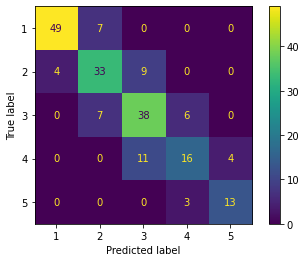

In [34]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.5f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))


#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot()

In [35]:
scores = cross_val_score(logmodel, X, y.values.ravel(), cv=10)
print(scores)
print("\nRESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.77       0.78       0.8        0.67       0.72       0.76
 0.78       0.80808081 0.66666667 0.71717172]

RESULT: 0.75 accuracy with a standard deviation of 0.05


In [36]:
# Using the Logistic Regression method

from sklearn.svm import SVC

svcmodel = SVC(random_state=2021)
svcmodel.fit(X_train, np.ravel(y_train))

predictions = svcmodel.predict(X_test)
predictions

array([2, 4, 2, 5, 1, 3, 1, 2, 3, 2, 4, 1, 2, 4, 2, 3, 3, 3, 3, 2, 4, 2,
       3, 5, 4, 4, 1, 3, 4, 1, 1, 3, 3, 1, 2, 1, 1, 1, 2, 3, 3, 2, 3, 4,
       1, 2, 1, 1, 3, 3, 2, 3, 1, 2, 3, 2, 5, 1, 1, 4, 2, 4, 3, 3, 3, 2,
       2, 3, 1, 3, 2, 1, 1, 5, 4, 5, 3, 5, 3, 1, 3, 5, 3, 3, 5, 2, 4, 2,
       2, 2, 2, 1, 1, 4, 3, 4, 1, 1, 3, 2, 2, 2, 2, 3, 5, 4, 3, 2, 1, 5,
       3, 3, 2, 4, 3, 1, 2, 3, 3, 1, 5, 2, 3, 2, 2, 1, 1, 3, 1, 4, 4, 3,
       2, 3, 1, 3, 2, 1, 3, 2, 1, 1, 2, 1, 2, 3, 3, 5, 3, 3, 3, 3, 5, 5,
       4, 3, 5, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 2, 1, 3, 1,
       2, 2, 1, 5, 4, 3, 3, 1, 1, 2, 1, 4, 2, 4, 3, 1, 2, 1, 1, 3, 2, 3,
       2, 3], dtype=int64)

              precision    recall  f1-score   support

           1       0.89      0.84      0.86        56
           2       0.69      0.72      0.70        46
           3       0.67      0.80      0.73        51
           4       0.68      0.48      0.57        31
           5       0.81      0.81      0.81        16

    accuracy                           0.74       200
   macro avg       0.75      0.73      0.74       200
weighted avg       0.75      0.74      0.74       200

You have got  0.74 accuracy  in this prediction


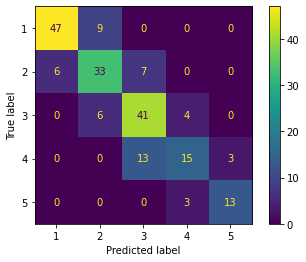

In [37]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions, zero_division=0))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=svcmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=svcmodel.classes_)
disp.plot()

In [38]:
scores = cross_val_score(svcmodel, X, y.values.ravel(), cv=10)
print(scores)
print("\nRESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.77       0.81       0.71       0.61       0.66       0.73
 0.74       0.72727273 0.62626263 0.78787879]

RESULT: 0.72 accuracy with a standard deviation of 0.06


In [39]:
# Using the GridSeacrh method

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

param_grid = {'C':[200], 'gamma':[0.0005], 'kernel':['rbf']}

grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3)

grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.794 total time=   0.0s
[CV 2/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.713 total time=   0.0s
[CV 3/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.805 total time=   0.0s
[CV 4/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.654 total time=   0.0s
[CV 5/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.692 total time=   0.0s


GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [200], 'gamma': [0.0005], 'kernel': ['rbf']},
             verbose=3)

In [40]:
grid.best_params_

{'C': 200, 'gamma': 0.0005, 'kernel': 'rbf'}

In [41]:
grid.best_estimator_

SVC(C=200, gamma=0.0005, random_state=2021)

In [42]:
predictions = grid.predict(X_test)
predictions

array([2, 5, 1, 5, 1, 3, 1, 2, 2, 2, 4, 1, 2, 3, 2, 3, 3, 3, 3, 2, 4, 2,
       3, 4, 4, 4, 1, 2, 4, 1, 2, 3, 3, 1, 1, 1, 1, 1, 2, 3, 3, 2, 3, 4,
       2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 4, 2, 5, 2, 1, 4, 3, 4, 3, 3, 3, 2,
       2, 3, 1, 3, 2, 1, 1, 5, 3, 5, 3, 5, 4, 1, 3, 5, 3, 3, 5, 2, 4, 2,
       2, 2, 2, 1, 1, 4, 3, 4, 1, 1, 3, 3, 2, 3, 2, 3, 5, 4, 3, 2, 1, 5,
       3, 3, 2, 4, 3, 1, 2, 3, 3, 1, 5, 2, 3, 2, 3, 1, 1, 3, 1, 4, 4, 4,
       2, 3, 1, 3, 2, 1, 4, 2, 1, 1, 2, 1, 2, 3, 3, 5, 3, 2, 3, 3, 5, 5,
       4, 3, 5, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 2, 3, 1, 3, 3, 2, 1, 3, 1,
       2, 2, 1, 5, 4, 3, 3, 1, 1, 2, 1, 4, 2, 4, 3, 1, 2, 1, 1, 3, 3, 3,
       1, 3], dtype=int64)

              precision    recall  f1-score   support

           1       0.92      0.88      0.90        56
           2       0.69      0.72      0.70        46
           3       0.66      0.76      0.71        51
           4       0.71      0.55      0.62        31
           5       0.81      0.81      0.81        16

    accuracy                           0.76       200
   macro avg       0.76      0.74      0.75       200
weighted avg       0.76      0.76      0.75       200

You have got  0.75500 accuracy  in this prediction


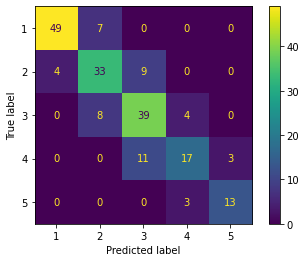

In [43]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.5f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

cm = confusion_matrix(y_test, predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()

In [44]:
scores = cross_val_score(grid, X, y.values.ravel(), cv=10)
print(scores)
print("\nRESULT: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.672 total time=   0.0s
[CV 3/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.765 total time=   0.0s
[CV 4/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.771 total time=   0.0s
[CV 5/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.670 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.778 total time=   0.0s
[CV 2/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.661 total time=   0.0s
[CV 3/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.754 total time=   0.0s
[CV 4/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.788 total time=   0.0s
[CV 5/5] END ...C=200, gamma=0.0005, kernel=rbf;, score=0.659 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.7.0


In [58]:
X = training.drop(['writing score'], axis=1)
y = training[['writing score']]

scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [59]:
X_scaled.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,1.0,0.25,1.0,1.0,0.0,0.72,0.662651
1,1.0,0.50,0.2,1.0,1.0,0.69,0.879518
2,1.0,0.25,0.8,1.0,0.0,0.90,0.939759
3,0.0,0.00,0.6,0.0,0.0,0.47,0.481928
4,0.0,0.50,0.2,1.0,0.0,0.76,0.734940


In [60]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(16, input_dim=7, activation=activation))
    model.add(Dense(8,  activation=activation))
    model.add(Dense(1,  activation='relu'))
    
    model.compile(loss='mae',
                  optimizer = tf.optimizers.Adam(learning_rate),
                  metrics = ['mae', 'mse', 'accuracy'])
    return model

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=2021, stratify=y)

In [62]:
TUNING_DICT = {
    'activation'    : ['relu','sigmoid'],
    'learning_rate' : [0.001, 0.005, 0.0001]
}

kf = KFold(n_splits=5, shuffle=True, random_state=2021)

model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV (estimator = model,
                            param_grid = TUNING_DICT,
                            cv = kf,
                            scoring = 'neg_mean_absolute_error',
                            refit='True',
                            verbose=3)

grid_search.fit(X_train, y_train, validation_split=0.2, verbose=3)

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_4016/1934550853.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV 1/5] END activation=relu, learning_rate=0.001;, score=-0.364 total time=   1.0s
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV 2/5] END activation=relu, learning_rate=0.001;, score=-0.107 total time=   1.0s
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
[CV 3/5] END activation=relu, learning_rate=0.001;, score=-0.384 total time=   

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001845B7DD580>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rate': [0.001, 0.005, 0.0001]},
             refit='True', scoring='neg_mean_absolute_error', verbose=3)

In [63]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.209863 using {'activation': 'relu', 'learning_rate': 0.005}


In [64]:
best_mlp_model = grid_search.best_estimator_

predictions = best_mlp_model.predict(X_test)
predictions

array([1.4023066e-01, 9.7039723e-01, 1.5081155e-01, 9.0461159e-01,
       0.0000000e+00, 6.0675895e-01, 0.0000000e+00, 1.6992262e-01,
       4.0134612e-01, 2.3874301e-01, 9.3442369e-01, 1.6810673e-01,
       3.9698765e-01, 6.9166160e-01, 3.9298221e-01, 5.1672876e-01,
       5.3819132e-01, 5.0782824e-01, 6.7957425e-01, 2.8627238e-01,
       7.6202619e-01, 3.0803552e-01, 6.5576911e-01, 8.9704156e-01,
       8.5318363e-01, 8.8367403e-01, 1.4397505e-01, 3.1943074e-01,
       8.7431657e-01, 9.6295819e-02, 2.1623778e-01, 7.0145607e-01,
       6.0958421e-01, 5.2336320e-02, 1.4802948e-01, 2.7095765e-02,
       0.0000000e+00, 5.7554886e-02, 3.1854692e-01, 6.2026942e-01,
       5.5624521e-01, 2.5469455e-01, 5.9133220e-01, 8.2780170e-01,
       2.5741377e-01, 1.7867199e-01, 1.2114033e-02, 0.0000000e+00,
       4.0539542e-01, 4.4807181e-01, 2.7057418e-01, 5.2790105e-01,
       0.0000000e+00, 2.4321488e-01, 8.9494824e-01, 3.1845185e-01,
       1.0769964e+00, 4.4942960e-01, 0.0000000e+00, 8.7586641e

In [65]:
predictions = predictions.reshape(predictions.shape[0], 1)
predictions

array([[1.4023066e-01],
       [9.7039723e-01],
       [1.5081155e-01],
       [9.0461159e-01],
       [0.0000000e+00],
       [6.0675895e-01],
       [0.0000000e+00],
       [1.6992262e-01],
       [4.0134612e-01],
       [2.3874301e-01],
       [9.3442369e-01],
       [1.6810673e-01],
       [3.9698765e-01],
       [6.9166160e-01],
       [3.9298221e-01],
       [5.1672876e-01],
       [5.3819132e-01],
       [5.0782824e-01],
       [6.7957425e-01],
       [2.8627238e-01],
       [7.6202619e-01],
       [3.0803552e-01],
       [6.5576911e-01],
       [8.9704156e-01],
       [8.5318363e-01],
       [8.8367403e-01],
       [1.4397505e-01],
       [3.1943074e-01],
       [8.7431657e-01],
       [9.6295819e-02],
       [2.1623778e-01],
       [7.0145607e-01],
       [6.0958421e-01],
       [5.2336320e-02],
       [1.4802948e-01],
       [2.7095765e-02],
       [0.0000000e+00],
       [5.7554886e-02],
       [3.1854692e-01],
       [6.2026942e-01],
       [5.5624521e-01],
       [2.546945

In [66]:
predictions_unscaled = scaler_y.inverse_transform(predictions)
predictions_unscaled[:10]

array([[1.5609226],
       [4.881589 ],
       [1.6032462],
       [4.6184464],
       [1.       ],
       [3.4270358],
       [1.       ],
       [1.6796905],
       [2.6053843],
       [1.954972 ]], dtype=float32)

In [67]:
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_test_unscaled[:10]

array([[1.],
       [4.],
       [2.],
       [5.],
       [1.],
       [3.],
       [1.],
       [2.],
       [3.],
       [2.]])

In [68]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score

# Printing the results
print(r2_score(y_test, y_test_unscaled))
print("You have got \033[1m %0.5f regression score \033[0m in this prediction" % r2_score(y_test,y_test_unscaled))


-53.97459945291129
You have got  -53.97460 regression score  in this prediction
